In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, cm

%matplotlib inline

In [2]:
def print_training_logs(filename):
    logs = pd.read_csv(filename, index_col="epoch")

    cmap = cm.get_cmap('tab20c')
    
    fig, ax = plt.subplots(figsize=(10,5))
    if "lr" in logs:
        ax1, ax2, ax3 = [ax, ax.twinx(), ax.twinx()]
    else:
        ax1, ax2 = [ax, ax.twinx()]
    
    color = cmap(0.0)
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("loss", color=color)
    ax1.tick_params(axis='y', colors=color)
    loss, = ax1.plot(logs["loss"], label="training loss", color=cmap(0.1))
    val_loss, = ax1.plot(logs["val_loss"], label="validation loss", color=color)
    ax1.set_ylim(0.7, 3.7)

    color = cmap(0.2)
    ax2.set_ylabel("accuracy", color=color)
    ax2.tick_params(axis='y', colors=color)
    acc, = ax2.plot(logs["acc"], label="training accuracy", color=cmap(0.3))
    val_acc, = ax2.plot(logs["val_acc"], label="validation accuracy", color=color)
    ax2.set_ylim(1, 0)
    
    if "lr" in logs:
        color = cmap(1.0)
        ax3.spines['right'].set_position(('axes', 1.1))
        ax3.set_ylabel("learning rate", color=color)
        ax3.tick_params(axis='y', colors=color)
        ax3.set_yscale('log')
        lr, = ax3.plot(logs[["lr"]], label="learning rate", color=color)
        p = [loss, val_loss, acc, val_acc, lr]
    else:
        p = [loss, val_loss, acc, val_acc]

    ax.legend(p, [p_.get_label() for p_ in p])

    plt.show()

First some results from the happy times on Paperspace... for some reason these are much better behaved than the latter local runs.

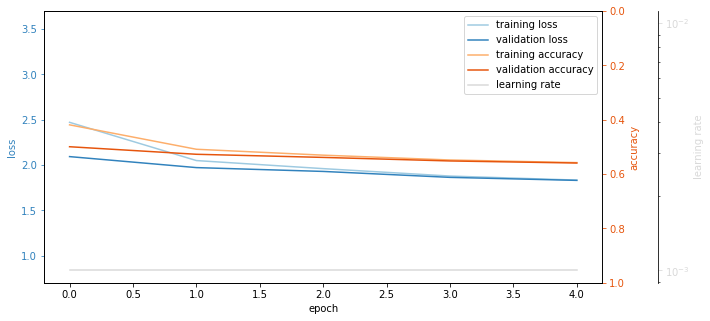

In [3]:
print_training_logs('../nn/01_first_nn.csv')

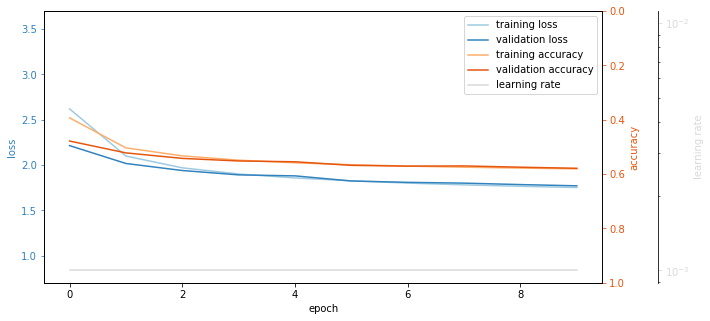

In [4]:
print_training_logs('../nn/02_resnet34.csv')

And, following are local runs on my GTX 1080:

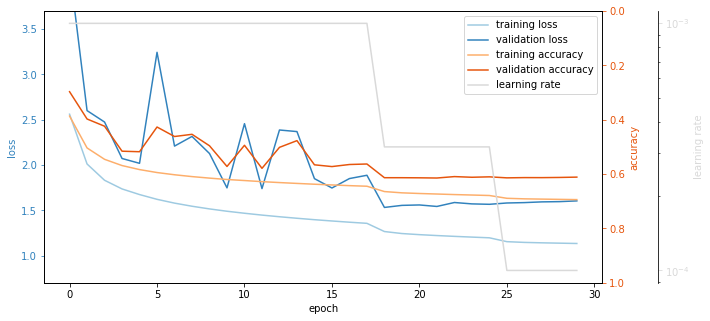

In [5]:
print_training_logs('../nn/02_resnet34_1080.csv')

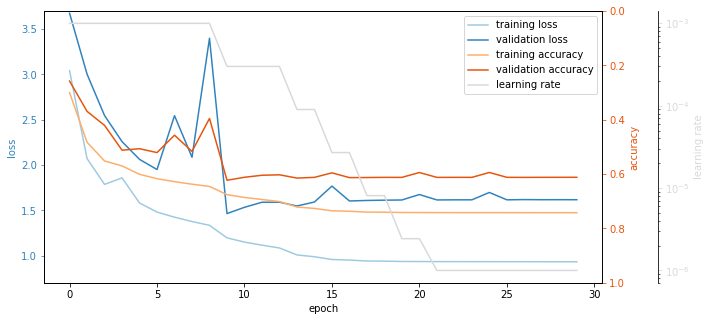

In [6]:
print_training_logs('../nn/03_resnet50.csv')

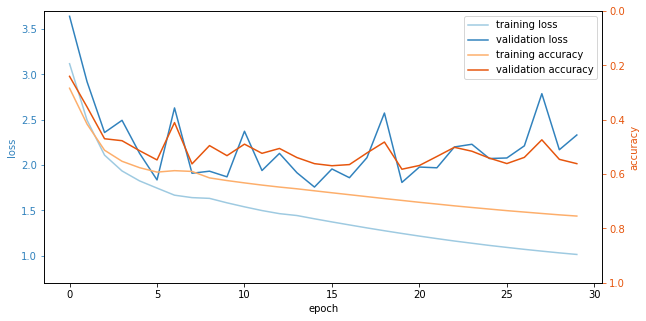

In [7]:
print_training_logs('../nn/03_resnet50_no_reducer.csv')

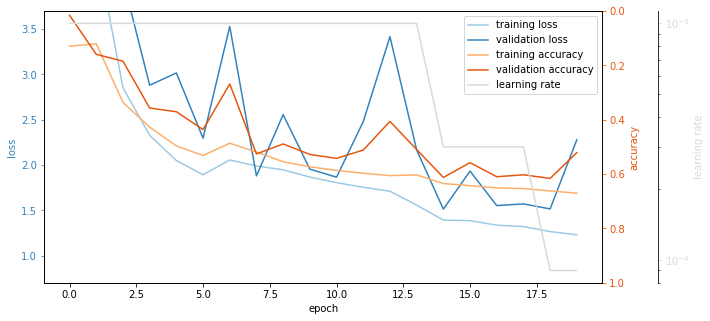

In [14]:
print_training_logs('../nn/04_resnet152.csv')